In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
#import the data
#This dataset was sourced from the UCI Machine Learning Repository.

data=pd.read_csv("https://assets.datacamp.com/production/course_2072/datasets/fish.csv",header=None)

In [4]:
features=data.iloc[:,1:]
labels=data.iloc[:,0]

In [5]:
features.shape , labels.shape

((85, 6), (85,))

## How many clusters of grains

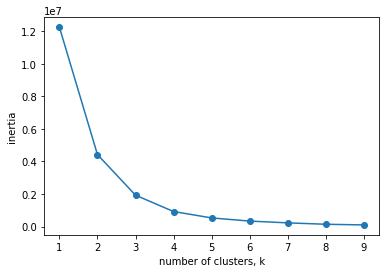

In [6]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model1=KMeans(n_clusters=k)
    
    # Fit model to samples
    model1.fit(features)
    
    # Append the inertia to the list of inertias
    inertias.append(model1.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


According to the elbow criteria, it is 4 clusters. Thus, coinciding with our lables. 

bream,roach,pike,smelt

## Evaluating the grain clustering

In [7]:


# Create a KMeans model with 3 clusters: model
model2 = KMeans(n_clusters=4)

# Use fit_predict to fit model and obtain cluster labels: labels
predicted_labels1 = model2.fit_predict(features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'predicted_labels': predicted_labels1, 'labels': labels})

# Create crosstab: ct
pd.crosstab(df['predicted_labels'],df['labels'])

labels,Bream,Pike,Roach,Smelt
predicted_labels,,,,
0,16,2,0,0
1,1,1,17,14
2,0,4,0,0
3,17,10,3,0


Our Model has performed very poorly. this is due the fact that variance in our features is very high.

In [8]:
data.var(axis=0)

1    145110.683403
2       127.451689
3       148.475328
4       174.168524
5       107.154440
6         4.483703
dtype: float64

To account for the high variance , we have to scale our features.

In [9]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Create scaler: scaler
scaler1 = StandardScaler()

# Create KMeans instance: kmeans
kmeans1 = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline1 = make_pipeline(scaler1,kmeans1)


In [10]:
# Fit the pipeline to samples
pipeline1.fit(features)


# Use fit_predict to fit model and obtain cluster labels: labels
predicted_labels2 = pipeline1.predict(features)

# Create a DataFrame with labels and varieties as columns: df
df2 = pd.DataFrame({'predicted_labels': predicted_labels2, 'labels': labels})

# Create crosstab: ct
pd.crosstab(df2['predicted_labels'],df2['labels'])

labels,Bream,Pike,Roach,Smelt
predicted_labels,,,,
0,0,0,0,13
1,33,0,1,0
2,0,17,0,0
3,1,0,19,1


The Scaling has done its job. Now the predictions of model is accurate than before

## Dimensionality Reduction

In [11]:
from sklearn.decomposition import PCA

Finding the intrinsic dimension

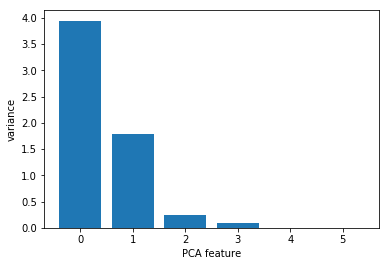

In [17]:
# Create scaler: scaler
scaler2 = StandardScaler()

# Create a PCA instance: pca
pca1 = PCA()

# Create pipeline: pipeline
pipeline2 = make_pipeline(scaler2,pca1)

# Fit the pipeline to 'features'
pipeline2.fit(features)



# Plot the explained variances
features_x = range(pca1.n_components_)
plt.bar(features_x, pca1.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features_x)
plt.show()

Based on the above graph, we can find the intrinsic dimension to be 2. so effectively our six dimensional feature set can be reduced to 2 dimensions.

In [18]:
# Create scaler: scaler
scaler3 = StandardScaler()

# Create a PCA instance: pca
pca2 = PCA(n_components=2)


# Create KMeans instance: kmeans
kmeans2 = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline3 = make_pipeline(scaler3,pca2,kmeans2)

# Fit the pipeline to 'features'
pipeline3.fit(features)


# Use fit_predict to fit model and obtain cluster labels: labels
predicted_labels3 = pipeline3.predict(features)

# Create a DataFrame with labels and varieties as columns: df
df3 = pd.DataFrame({'predicted_labels': predicted_labels3, 'labels': labels})

# Create crosstab: ct
print(pd.crosstab(df3['predicted_labels'],df3['labels']))

labels            Bream  Pike  Roach  Smelt
predicted_labels                           
0                    31     0      1      0
1                     3     0     19      0
2                     0    17      0      0
3                     0     0      0     14


The predictions of our model is same as it was with 6 features.

In [29]:
pca_features=pca2.fit_transform(features)
pca_features[:10]

array([[-189.75877011,   -8.21255743],
       [-141.72337782,   -9.68571872],
       [ -91.78978749,  -10.74571942],
       [ -68.62250237,   -7.18519421],
       [  -1.69908956,   -7.49077343],
       [  18.34524816,   -9.39464772],
       [  68.28895205,  -12.2117605 ],
       [ -41.56079743,   -5.09799684],
       [  18.39321023,   -9.42940507],
       [  68.40220112,   -9.13593437]])

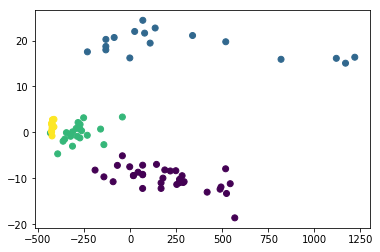

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
species=le.fit_transform(labels)
#-----------------------------------------------------------------------------------

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys,c=species)

plt.show()

In [34]:
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])